In [60]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import svm

In [3]:
df = pd.read_excel('./농넷_영주시_일별사과_등급조정.xlsx')

In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(df['등급명'])
df['등급명'] = encoder.transform(df['등급명'])
df

,DATE,거래단위,평균가격(원),총거래물량(kg),총거래금액(원),시장명,법인명,품목명,품종명,산지명,산지시군명,등급명
0,2024-03-13,10.0,62366.666667,1800.0,11226000,서울가락도매,동화청과,사과,미시마,경상북도,영주시,3
1,2024-03-13,10.0,95000.000000,3840.0,36480000,서울가락도매,서울청과,사과,후지,경상북도,영주시,3
2,2024-03-13,10.0,60900.000000,1200.0,7308000,수원도매시장,경기청과,사과,미얀마,경북,영주시,3
3,2024-03-13,10.0,61300.000000,600.0,3678000,인천삼산도매,경인농산,사과,미시마,경상북도,영주시,3
4,2024-03-13,20.0,152875.568182,3520.0,26906100,안동도매시장,안동청과,사과,미얀마,경북,영주시,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65184,2020-01-03,10.0,24833.333333,2400.0,5960000,서울가락도매,농협가락(공),사과,미안마,경북,영주시,3
65185,2020-01-03,10.0,20000.000000,300.0,600000,서울가락도매,농협가락(공),사과,후지,경북,영주시,3
65186,2020-01-03,18.0,25200.000000,2700.0,3780000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3
65187,2020-01-03,18.0,25200.000000,1620.0,2268000,구리도매시장,농협구리(공),사과,기타사과,경북,영주시,3


In [168]:
encoder.classes_

array(['등외', '보통', '상', '특'], dtype=object)

In [5]:
df_temp = df[['등급명', '총거래물량(kg)', '평균가격(원)', '총거래금액(원)', '거래단위']]
df_temp

,등급명,총거래물량(kg),평균가격(원),총거래금액(원),거래단위
0,3,1800.0,62366.666667,11226000,10.0
1,3,3840.0,95000.000000,36480000,10.0
2,3,1200.0,60900.000000,7308000,10.0
3,3,600.0,61300.000000,3678000,10.0
4,0,3520.0,152875.568182,26906100,20.0
...,...,...,...,...,...
65184,3,2400.0,24833.333333,5960000,10.0
65185,3,300.0,20000.000000,600000,10.0
65186,3,2700.0,25200.000000,3780000,18.0
65187,3,1620.0,25200.000000,2268000,18.0


In [6]:
def detect_outliers(df, columns):
    q1 = df[columns].quantile(0.25)
    q3 = df[columns].quantile(0.75)

    iqr = q3 - q1

    boundary = 1.5 * iqr

    index1 = df[df[columns] > q3 + boundary].index
    index2 = df[df[columns] < q1 - boundary].index

    df[columns] = df[columns].drop(index1)
    df[columns] = df[columns].drop(index2)

    return df

In [7]:
detect_outliers(df_temp, '총거래물량(kg)')
detect_outliers(df_temp, '평균가격(원)')
detect_outliers(df_temp, '총거래금액(원)')
detect_outliers(df_temp, '거래단위')

C:\Users\asiae\AppData\Local\Temp\ipykernel_19540\3772546017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index1)
C:\Users\asiae\AppData\Local\Temp\ipykernel_19540\3772546017.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = df[columns].drop(index2)
C:\Users\asiae\AppData\Local\Temp\ipykernel_19540\3772546017.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

,등급명,총거래물량(kg),평균가격(원),총거래금액(원),거래단위
0,3,1800.0,62366.666667,11226000.0,10.0
1,3,NaN,95000.000000,NaN,10.0
2,3,1200.0,60900.000000,7308000.0,10.0
3,3,600.0,61300.000000,3678000.0,10.0
4,0,3520.0,NaN,NaN,20.0
...,...,...,...,...,...
65184,3,2400.0,24833.333333,5960000.0,10.0
65185,3,300.0,20000.000000,600000.0,10.0
65186,3,2700.0,25200.000000,3780000.0,18.0
65187,3,1620.0,25200.000000,2268000.0,18.0


In [8]:
df_temp.isnull().sum()

등급명             0
총거래물량(kg)    5409
평균가격(원)      3166
총거래금액(원)     5859
거래단위            0
dtype: int64

In [9]:
df_temp = df_temp.dropna()

In [10]:
df_temp.isnull().sum()

등급명          0
총거래물량(kg)    0
평균가격(원)      0
총거래금액(원)     0
거래단위         0
dtype: int64

In [11]:
corrs = df_temp.corr()
print(corrs)



                등급명  총거래물량(kg)   평균가격(원)  총거래금액(원)      거래단위
등급명        1.000000   0.296945 -0.306131  0.348974 -0.737477
총거래물량(kg)  0.296945   1.000000 -0.076302  0.831792 -0.199528
평균가격(원)   -0.306131  -0.076302  1.000000  0.165992  0.423833
총거래금액(원)   0.348974   0.831792  0.165992  1.000000 -0.328569
거래단위      -0.737477  -0.199528  0.423833 -0.328569  1.000000


<Axes: >

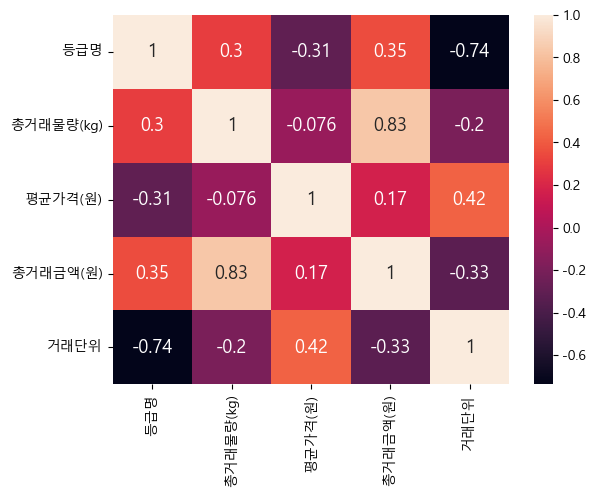

In [12]:
import seaborn as sns



import matplotlib.font_manager as fm  # 폰트 관련 용도
import matplotlib

matplotlib.rcParams['font.family'] = 'malgun Gothic'   # '맑은 고딕'으로 설정 
matplotlib.rcParams['axes.unicode_minus'] = False  

sns.heatmap(corrs, annot= True, annot_kws={'size' : 13})

In [34]:
X = df_temp[['평균가격(원)', '총거래금액(원)', '거래단위', '총거래물량(kg)']].values
y = df_temp['등급명'].values

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [36]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(X_train)

X_train_scaled = std.transform(X_train)
X_test_scaled = std.transform(X_test)

# 여기서부터 BASIC 모델 선정 

In [16]:
# voting (로지스틱, knn, 결정트리)

# 로지스틱
lr_clf = LogisticRegression()
# knn
knn_clf = KNeighborsClassifier()
# 결정트리
df_clf = DecisionTreeClassifier()

vo_clf = VotingClassifier(estimators= [('LR', lr_clf), ('KNN', knn_clf), ('DT', df_clf)], voting='soft')

vo_clf.fit(X_train_scaled, y_train)


VotingClassifier(estimators=[('LR', LogisticRegression()),
                             ('KNN', KNeighborsClassifier()),
                             ('DT', DecisionTreeClassifier())],
                 voting='soft')

In [17]:
# 랜덤포레스트 

y_pred_test = vo_clf.predict(X_test_scaled)
test_score = accuracy_score(y_test, y_pred_test)
print(f'voting test score: {test_score}')


voting test score: 0.6618418671973946


In [18]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_jobs=-1, random_state=42)
rf_clf.fit(X_train_scaled, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [19]:
print(f'train score: {rf_clf.score(X_train_scaled, y_train)}')
print(f'test score: {rf_clf.score(X_test_scaled, y_test)}')

train score: 0.9655554550389
test score: 0.6424823593269404


In [20]:
# adaboost

from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier(n_estimators=50, algorithm='SAMME.R', learning_rate=1)
ada_clf.fit(X_train_scaled, y_train)

print(f"train_score: {ada_clf.score(X_train_scaled, y_train)}")
print(f"test_score: {ada_clf.score(X_test_scaled, y_test)}")


train_score: 0.6835534648091188
test_score: 0.6806585851275556


In [77]:
# 그래디언트부스트

from sklearn.ensemble import GradientBoostingClassifier
basic_gb = GradientBoostingClassifier(random_state=42, learning_rate = 0.01, max_depth = 8, min_samples_split = 16, n_estimators=500)

basic_gb.fit(X_train_scaled, y_train)

print(f"train: {basic_gb.score(X_train_scaled, y_train)}")
print(f"test_score: {basic_gb.score(X_test_scaled, y_test)}")

train: 0.752985344671612
test_score: 0.7203727157590013


In [83]:
# XGBboost

from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, n_estimatorts = 1000, learning_rate = 0.01)
xgb.fit(X_train_scaled, y_train)

y_pred_train = xgb.predict(X_train_scaled)
print(f"train_score: {accuracy_score(y_train, y_pred_train)}")
y_pred_test = xgb.predict(X_test_scaled)
print(f"test_score: {accuracy_score(y_test, y_pred_test)}")


c:\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [18:23:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimatorts" } are not used.

  warnings.warn(smsg, UserWarning)


train_score: 0.7260493938845667
test_score: 0.7222724805500271


In [144]:
# LGBM 

from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42, max_depth = 5, num_leaves = 48, colsample_bytree = 1, learning_rate = 0.01, min_child_samples = 4000, n_estimators = 1000, subsample = 0.5)
lgb.fit(X_train_scaled, y_train)

y_pred_train = lgb.predict(X_train_scaled)
print(f"train_score: {accuracy_score(y_train, y_pred_train)}")
y_pred_test = lgb.predict(X_test_scaled)
print(f"test_score: {accuracy_score(y_test, y_pred_test)}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000344 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 790
[LightGBM] [Info] Number of data points in the train set: 44216, number of used features: 4
[LightGBM] [Info] Start training from score -1.063524
[LightGBM] [Info] Start training from score -2.415878
[LightGBM] [Info] Start training from score -1.660022
[LightGBM] [Info] Start training from score -0.979925
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [78]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(random_state=42, depth = 5, grow_policy = 'SymmetricTree', learning_rate = 0.01, min_child_samples = 5, n_estimators = 10000)
cat.fit(X_train_scaled, y_train)

y_pred_train = cat.predict(X_train_scaled)
print(f"train_score: {accuracy_score(y_train, y_pred_train)}")
y_pred_test = cat.predict(X_test_scaled)
print(f"test_score: {accuracy_score(y_test, y_pred_test)}")

0:	learn: 1.3736336	total: 6.55ms	remaining: 1m 5s
1:	learn: 1.3613055	total: 13.5ms	remaining: 1m 7s
2:	learn: 1.3493810	total: 19.8ms	remaining: 1m 5s
3:	learn: 1.3378380	total: 25.1ms	remaining: 1m 2s
4:	learn: 1.3266470	total: 31.2ms	remaining: 1m 2s
5:	learn: 1.3157161	total: 36.8ms	remaining: 1m 1s
6:	learn: 1.3052519	total: 41.5ms	remaining: 59.2s
7:	learn: 1.2950160	total: 47.1ms	remaining: 58.9s
8:	learn: 1.2852467	total: 52.3ms	remaining: 58.1s
9:	learn: 1.2754930	total: 57.2ms	remaining: 57.2s
10:	learn: 1.2659853	total: 62.3ms	remaining: 56.5s
11:	learn: 1.2568863	total: 68.1ms	remaining: 56.7s
12:	learn: 1.2481109	total: 72.9ms	remaining: 56s
13:	learn: 1.2393000	total: 77.7ms	remaining: 55.4s
14:	learn: 1.2307666	total: 83.3ms	remaining: 55.4s
15:	learn: 1.2225476	total: 88.3ms	remaining: 55.1s
16:	learn: 1.2145570	total: 92.9ms	remaining: 54.5s
17:	learn: 1.2066520	total: 97.7ms	remaining: 54.2s
18:	learn: 1.1990211	total: 103ms	remaining: 53.9s
19:	learn: 1.1913866	tota

# 그리드서치 - Catboost

In [25]:

params = {
    'n_estimators': [10000],
    'depth': [2, 3, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_child_samples': [5, 10, 20 ],
    'grow_policy': ['SymmetricTree', 'Lossguide', 'Depthwise']
}
cat = CatBoostClassifier(random_state=42)
cat_grid = GridSearchCV(cat, param_grid= params, n_jobs= -1, cv = 5, scoring= 'accuracy' )

cat_grid.fit(X_train_scaled, y_train)

0:	learn: 1.3736336	total: 10.4ms	remaining: 1m 44s
1:	learn: 1.3613055	total: 22.9ms	remaining: 1m 54s
2:	learn: 1.3493810	total: 30.4ms	remaining: 1m 41s
3:	learn: 1.3378380	total: 36.9ms	remaining: 1m 32s
4:	learn: 1.3266470	total: 43.8ms	remaining: 1m 27s
5:	learn: 1.3157161	total: 51.2ms	remaining: 1m 25s
6:	learn: 1.3052519	total: 58.2ms	remaining: 1m 23s
7:	learn: 1.2950160	total: 65.9ms	remaining: 1m 22s
8:	learn: 1.2852467	total: 73.1ms	remaining: 1m 21s
9:	learn: 1.2754930	total: 81.3ms	remaining: 1m 21s
10:	learn: 1.2659853	total: 88.4ms	remaining: 1m 20s
11:	learn: 1.2568863	total: 96.7ms	remaining: 1m 20s
12:	learn: 1.2481109	total: 105ms	remaining: 1m 20s
13:	learn: 1.2393000	total: 112ms	remaining: 1m 20s
14:	learn: 1.2307666	total: 121ms	remaining: 1m 20s
15:	learn: 1.2225476	total: 128ms	remaining: 1m 20s
16:	learn: 1.2145570	total: 137ms	remaining: 1m 20s
17:	learn: 1.2066520	total: 146ms	remaining: 1m 20s
18:	learn: 1.1990211	total: 155ms	remaining: 1m 21s
19:	learn:

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x0000022472AAD6D0>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 5],
                         'grow_policy': ['SymmetricTree', 'Lossguide',
                                         'Depthwise'],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [10000]},
             scoring='accuracy')

In [28]:
cat_grid.best_params_

{'depth': 5,
 'grow_policy': 'SymmetricTree',
 'learning_rate': 0.01,
 'min_child_samples': 5,
 'n_estimators': 10000}

In [29]:
print(f"train: {cat_grid.score(X_train_scaled, y_train)}")
print(f"test_score: {cat_grid.score(X_test_scaled, y_test)}")

train: 0.7318617694952053
test_score: 0.7209155056992944


# 부스트 세개 섞어보기 Stacking

## 네개를 섞어도 올라가지 않은 액큐러시,,, 723

In [117]:
# 부스트 세개.. 섞어보기 ㅎㅎㅎ 스태킹...?
from sklearn.ensemble import StackingClassifier
meta_model = GradientBoostingClassifier(random_state=42)

stacking_model = StackingClassifier(
    estimators=[('cat', cat), ('xgb', xgb), ('lgb', lgb), ('gb', basic_gb)],
    final_estimator=meta_model
)


In [118]:
stacking_model.fit(X_train_scaled, y_train)

0:	learn: 1.3736336	total: 6.58ms	remaining: 1m 5s
1:	learn: 1.3613055	total: 12.1ms	remaining: 1m
2:	learn: 1.3493810	total: 17.9ms	remaining: 59.7s
3:	learn: 1.3378380	total: 23.9ms	remaining: 59.8s
4:	learn: 1.3266470	total: 29.3ms	remaining: 58.5s
5:	learn: 1.3157161	total: 34.4ms	remaining: 57.3s
6:	learn: 1.3052519	total: 40.2ms	remaining: 57.4s
7:	learn: 1.2950160	total: 45.6ms	remaining: 56.9s
8:	learn: 1.2852467	total: 50.9ms	remaining: 56.5s
9:	learn: 1.2754930	total: 56.7ms	remaining: 56.7s
10:	learn: 1.2659853	total: 62ms	remaining: 56.3s
11:	learn: 1.2568863	total: 67ms	remaining: 55.8s
12:	learn: 1.2481109	total: 71.9ms	remaining: 55.2s
13:	learn: 1.2393000	total: 77.2ms	remaining: 55s
14:	learn: 1.2307666	total: 81.9ms	remaining: 54.5s
15:	learn: 1.2225476	total: 87.2ms	remaining: 54.4s
16:	learn: 1.2145570	total: 92.2ms	remaining: 54.1s
17:	learn: 1.2066520	total: 97.2ms	remaining: 53.9s
18:	learn: 1.1990211	total: 102ms	remaining: 53.8s
19:	learn: 1.1913866	total: 108m

TypeError: Cannot clone object '<keras.src.engine.sequential.Sequential object at 0x00000224407FA990>' (type <class 'keras.src.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [91]:
print(stacking_model.score(X_train_scaled, y_train))
print(stacking_model.score(X_test_scaled, y_test))


[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=500
0.7301881671793016
[LightGBM] [Warning] min_data_in_leaf is set=500, min_child_samples=40 will be ignored. Current value: min_data_in_leaf=500
0.7226343405102226


# 결국 신경망을 만듦 
### 챗선생님이 신경망, 분류 섞는게 더 좋을 것 같다하심 ->ㄱ ㅣ계 부수고 싶다 뭐가 좋냐 ....

In [99]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [100]:
model = Sequential()

model.add(Dense(64, activation='relu', input_shape=(4,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(9, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # 다중 클래스 분류의 경우
              metrics=['accuracy'])
model.summary()    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                320       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 9)                 585       
                                                                 
Total params: 5065 (19.79 KB)
Trainable params: 5065 (19.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [104]:
model.fit(X_train_scaled, y_train, epochs = 50, validation_data=(X_test_scaled, y_test), verbose = 2)



Epoch 1/50
1382/1382 - 2s - loss: 0.7882 - accuracy: 0.7130 - val_loss: 0.7742 - val_accuracy: 0.7177 - 2s/epoch - 1ms/step
Epoch 2/50
1382/1382 - 2s - loss: 0.7881 - accuracy: 0.7128 - val_loss: 0.7740 - val_accuracy: 0.7176 - 2s/epoch - 1ms/step
Epoch 3/50
1382/1382 - 2s - loss: 0.7869 - accuracy: 0.7126 - val_loss: 0.7753 - val_accuracy: 0.7173 - 2s/epoch - 1ms/step
Epoch 4/50
1382/1382 - 2s - loss: 0.7868 - accuracy: 0.7128 - val_loss: 0.7744 - val_accuracy: 0.7158 - 2s/epoch - 1ms/step
Epoch 5/50
1382/1382 - 2s - loss: 0.7851 - accuracy: 0.7145 - val_loss: 0.7761 - val_accuracy: 0.7172 - 2s/epoch - 1ms/step
Epoch 6/50
1382/1382 - 2s - loss: 0.7846 - accuracy: 0.7133 - val_loss: 0.7751 - val_accuracy: 0.7161 - 2s/epoch - 1ms/step
Epoch 7/50
1382/1382 - 2s - loss: 0.7841 - accuracy: 0.7140 - val_loss: 0.7773 - val_accuracy: 0.7147 - 2s/epoch - 1ms/step
Epoch 8/50
1382/1382 - 2s - loss: 0.7849 - accuracy: 0.7134 - val_loss: 0.7772 - val_accuracy: 0.7165 - 2s/epoch - 1ms/step
Epoch 9/

In [105]:
model.evaluate(X_test_scaled, y_test)

346/346 [==============================] - 0s 850us/step - loss: 0.7752 - accuracy: 0.7166


[0.7752083539962769, 0.716573178768158]

In [133]:
pip install scikeras


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [134]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [138]:
dnn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
dnn_model.fit(X_train_scaled, y_train)


MLPClassifier(max_iter=1000, random_state=42)

In [163]:
dnn_pred = dnn_model.predict_proba(X_test_scaled)[:, 1]
xgb_pred = xgb.predict_proba(X_test_scaled)[:, 1]
lgb_pred = lgb.predict_proba(X_test_scaled)[:, 1]
cat_pred = cat.predict_proba(X_test_scaled)[:, 1]

In [164]:
meta_features = np.column_stack((dnn_pred, xgb_pred, lgb_pred, cat_pred))

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

In [166]:
meta_model = GradientBoostingClassifier()
meta_model.fit(meta_features, y_test)

GradientBoostingClassifier()

In [167]:
print(f"train_score: {meta_model.score(X_train_scaled, y_train)}")
print(f"test_score: {meta_model.score(X_test_scaled, y_test)}")

train_score: 0.13567486882576443
test_score: 0.13008865569024788
